<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades-del-proyecto-equipo15/blob/main/Reto1_Equipo_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df_ejercicio2 = pd.read_csv("https://raw.githubusercontent.com/Samara332/dataSet/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding='cp1252')
df_ejercicio2.head()
     

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Empezamos analizando la data con la función .describe() para identificar alguna tendencia.

In [ ]:
df_ejercicio2.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


Identificamos los nombres de las columnas y que tipo de datos contiene

In [ ]:
df_ejercicio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Identificamos que variables cuentan con datos faltantes para posteriormente tomar la decisión si agregarle la media o eliminarlos

In [ ]:
df_ejercicio2.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [ ]:
df_ejercicio2[["SDT_mg/L"]]

,SDT_mg/L
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1063,NaN
1064,NaN
1065,NaN
1066,NaN


In [ ]:
del(df_ejercicio2["SDT_mg/L"])  #eliminamos la columna 14 la cual no tiene datos

In [ ]:
df_ejercicio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   object 
 15  CALIDAD_SDT_ra       

In [ ]:
df_ejercicio2[["CONTAMINANTES"]]

,CONTAMINANTES
0,NaN
1,NaN
2,"FLUO,AS,"
3,NaN
4,"NO3,"
...,...
1063,"CONDUC,DT,NO3,"
1064,"NO3,"
1065,"CONDUC,DT,NO3,"
1066,NaN


In [ ]:
df_ejercicio2.dropna(inplace=True)

In [ ]:
df_ejercicio2.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

Debido a que algunas de las columnas sin datos eran datos categóricos, al no poder colocar una media se deciden eliminar por lo que la base de datos queda con un total de 627 filas.

Dentro de los datos eliminados se elimina toda la columna 14 la cual no contaba con ningún dato

In [ ]:
corr=df_ejercicio2.corr()
corr

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.752286,NaN,0.197892,0.068227
LATITUD,-0.752286,1.000000,NaN,-0.163511,0.022198
PERIODO,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.197892,-0.163511,NaN,1.000000,0.140016
CONDUCT_mS/cm,0.068227,0.022198,NaN,0.140016,1.000000


In [ ]:
corr.dropna()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm


Correlación entre variables numéricas

In [ ]:
corr

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.752286,NaN,0.197892,0.068227
LATITUD,-0.752286,1.000000,NaN,-0.163511,0.022198
PERIODO,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.197892,-0.163511,NaN,1.000000,0.140016
CONDUCT_mS/cm,0.068227,0.022198,NaN,0.140016,1.000000


In [ ]:
df_ejercicio2.replace("SI",1, inplace=True)
df_ejercicio2.replace("NO",0, inplace=True)
df_ejercicio2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,1,1,1,0,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,1,1,0,1,1,1,1,1,1,1
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,1,0,1,1,1,1,1,1,1,1
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,1,1,0,1,1,1,1,1,1,1
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,0,0,1,0,1,1,1,1,0,0


In [ ]:
corr_categoricas=df_ejercicio2.corr()

In [ ]:
corr_categoricas.dropna()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE


Las variables binarias (Si y NO) se transforman con codigo binario para evaluar su correlación

In [ ]:
corr_categoricas

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
LONGITUD,1.000000,-0.752286,NaN,0.197892,0.068227,-0.034993,-0.076701,0.148446,0.148446,0.136629,-0.221445,0.145624,0.153050,0.185722,-0.043562,-0.102176,-0.027114,-0.015003,0.119695,-0.008963
LATITUD,-0.752286,1.000000,NaN,-0.163511,0.022198,0.104759,-0.013893,-0.174159,-0.174159,-0.110769,-0.032128,-0.009665,-0.155084,-0.192311,0.052147,0.174572,0.053915,0.103085,0.064607,0.096463
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.197892,-0.163511,NaN,1.000000,0.140016,-0.655945,-0.048447,0.016879,0.016879,0.106737,-0.198693,0.044495,0.025708,0.050911,-0.002438,0.042555,-0.032001,-0.024897,-0.109596,0.037561
CONDUCT_mS/cm,0.068227,0.022198,NaN,0.140016,1.000000,-0.133368,-0.678587,-0.570457,-0.570457,0.151313,-0.454982,0.056722,-0.130665,0.115342,0.002585,0.028365,-0.064328,-0.032791,0.006157,-0.024238
CUMPLE_CON_ALC,-0.034993,0.104759,NaN,-0.655945,-0.133368,1.000000,0.039373,0.028827,0.028827,-0.003292,0.017875,-0.085094,0.028722,-0.005050,-0.017889,-0.049507,-0.012639,-0.044173,0.101658,0.038140
CUMPLE_CON_COND,-0.076701,-0.013893,NaN,-0.048447,-0.678587,0.039373,1.000000,0.590070,0.590070,-0.159693,0.442622,-0.053757,0.184259,-0.125878,0.043281,-0.051057,0.080905,-0.010379,-0.066578,-0.002813
CUMPLE_CON_SDT_ra,0.148446,-0.174159,NaN,0.016879,-0.570457,0.028827,0.590070,1.000000,1.000000,-0.068456,0.421062,-0.030935,0.213551,-0.075490,-0.020054,0.010783,0.112743,-0.012557,0.022344,0.037555
CUMPLE_CON_SDT_salin,0.148446,-0.174159,NaN,0.016879,-0.570457,0.028827,0.590070,1.000000,1.000000,-0.068456,0.421062,-0.030935,0.213551,-0.075490,-0.020054,0.010783,0.112743,-0.012557,0.022344,0.037555
CUMPLE_CON_FLUO,0.136629,-0.110769,NaN,0.106737,0.151313,-0.003292,-0.159693,-0.068456,-0.068456,1.000000,-0.326896,-0.146204,-0.148148,0.279020,-0.037300,-0.080519,-0.026354,-0.066777,-0.220573,-0.157517


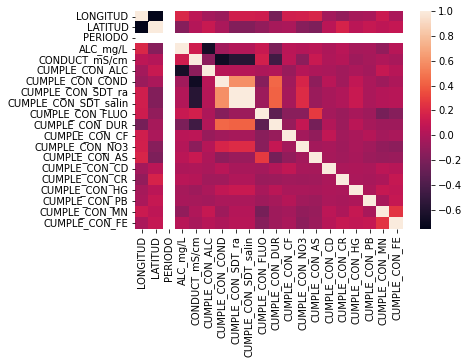

In [ ]:
sns.heatmap(corr_categoricas)

Se vuelve a correr la función describe para ver como queda la información despúes de la limpieza de datos

In [ ]:
df_ejercicio2.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,627.000000,627.000000,627.0,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,-101.829753,23.389029,2020.0,256.752735,1458.556778,0.909091,0.803828,0.888357,0.888357,0.696970,0.641148,0.902711,0.872408,0.800638,0.996810,0.976077,0.998405,0.980861,0.864434,0.786284
std,6.762085,3.743584,0.0,124.054412,1512.517178,0.287709,0.397417,0.315178,0.315178,0.459935,0.480047,0.296587,0.333901,0.399840,0.056433,0.152933,0.039936,0.137122,0.342601,0.410256
min,-116.664250,15.064110,2020.0,26.640000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.108390,20.481350,2020.0,182.182500,603.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,-102.374940,23.125250,2020.0,231.110000,1113.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,-99.050365,25.537065,2020.0,314.565000,1744.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,-86.868880,32.677713,2020.0,1650.000000,18577.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


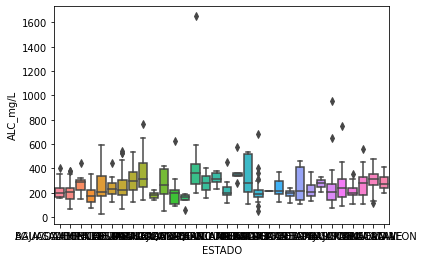

In [ ]:
sns.boxplot(x=df_ejercicio2["ESTADO"], y=df_ejercicio2["ALC_mg/L"], width=0.8, saturation=1.5)


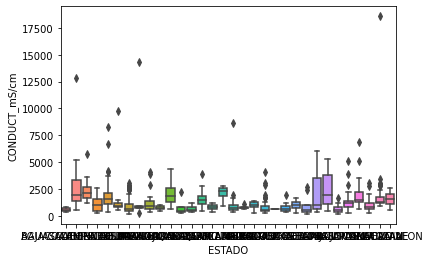

In [ ]:
sns.boxplot(x=df_ejercicio2["ESTADO"], y=df_ejercicio2["CONDUCT_mS/cm"], width=0.8, saturation=1.5)

In [ ]:
#Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
from sklearn.cluster import KMeans


In [ ]:
!pip install geopandas
import matplotlib
import geopandas as gpd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

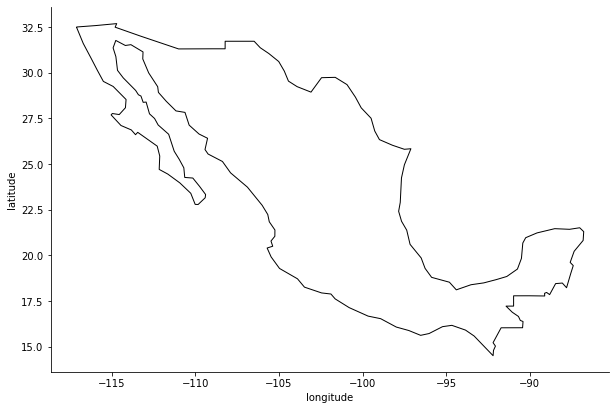

In [ ]:
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
df_ejercicio2["Coordinates"] = list(zip(df_ejercicio2.LONGITUD, df_ejercicio2.LATITUD))
df_ejercicio2["Coordinates"] = df_ejercicio2["Coordinates"].apply(Point)

gdf = gpd.GeoDataFrame(df_ejercicio2, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,1,1,0,1,1,1,1,1,1,POINT (-102.28801 22.36685)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,1,0,1,1,1,1,1,1,1,POINT (-110.24480 23.45138)
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,0,1,1,1,1,1,1,1,1,POINT (-110.22067 23.46493)
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,1,0,1,1,1,1,1,1,1,POINT (-109.90731 22.89050)
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,0,1,0,1,1,1,1,0,0,POINT (-110.05472 23.82472)


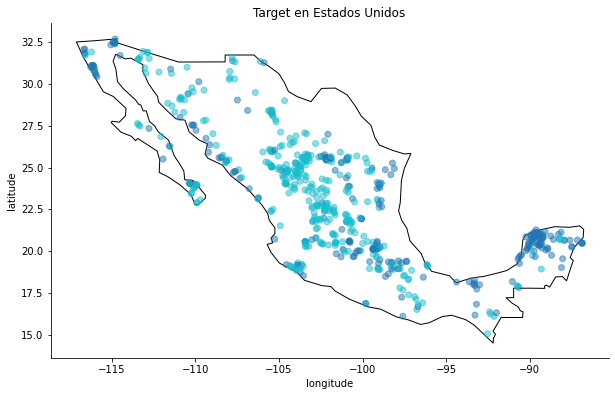

In [ ]:
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, column="SEMAFORO", alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.